In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
sensor_df=pd.read_csv('sample_dataset.csv')

In [3]:
sensor_df.sample(5)

,Unnamed: 0,end_epoch,start_epoch,time,value_1,value_2,value_3,value_4,value_5,value_6,...,value_17,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26
256832,256832,1538438400,1538352015,14:08:15,1.192744,1.181233,0.0000,55821.30859,21.442245,17.533150,...,61.670898,62.217175,0.843812,3589.010040,2.460932,0.404871,0.035918,64.725822,62.807667,62.968815
512939,512939,1558828800,1558742415,01:15:00,1305.052612,1310.145752,323670.9688,331100.93750,1751.319580,1756.362427,...,151.691910,154.046738,8.169335,3587.930176,24.620567,16.895025,0.331906,227.118500,120.181595,112.747177
374843,374843,1548892800,1548806415,01:51:00,1324.487061,1325.030396,303368.4375,0.00000,1796.449463,1803.549316,...,128.659943,137.838577,10.908376,3590.513428,24.466721,16.647018,0.245693,228.098785,81.830994,68.848274
109536,109536,1524009600,1523923215,00:24:15,1315.225830,1313.848633,321061.5938,317168.25000,1668.859131,1671.989868,...,138.433975,144.540024,8.545780,3588.616699,24.686985,16.964647,0.433834,225.630188,98.799294,88.212021
133709,133709,1525392000,1525305615,05:07:30,1306.831543,1306.264282,313922.4063,314612.50000,1764.479736,1767.368896,...,142.380295,147.646484,8.748537,3589.950439,24.646648,17.017065,0.279858,227.039169,105.055954,94.879211


In [4]:
def handle_epoch(value):
    date_time=datetime.datetime.fromtimestamp(value)
    return calendar.month_abbr[date_time.month]

In [5]:
sensor_df['month']=sensor_df['start_epoch'].apply(handle_epoch)

In [6]:
sensor_df.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [7]:
sensor_df=sensor_df.drop(columns=['end_epoch','start_epoch'])

In [8]:
sensor_df.sample(5)

,Unnamed: 0,time,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,...,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month
23871,23871,03:28:00,1288.178345,1287.583862,312322.2188,314897.8125,1755.143799,1757.681885,58.774071,68.445160,...,141.013870,9.302631,3588.998291,24.797577,16.755152,0.311836,228.089157,90.105118,76.825157,Jan
381501,381501,05:35:30,1311.607544,1312.818604,305154.9063,302163.6250,1669.020996,1670.658691,52.921059,53.582733,...,137.597153,10.139682,3589.238525,25.084906,17.193993,0.436384,226.985718,83.750504,72.069824,Feb
363378,363378,02:04:45,1300.020508,1299.337891,306243.8750,311588.0625,1764.247314,1768.411865,56.237518,65.025772,...,140.394852,10.635044,3589.925781,24.631239,16.931717,0.279782,227.957413,86.276169,74.193443,Jan
194534,194534,18:33:45,1295.049805,1296.622192,323886.9688,325866.5313,1756.132080,1759.912842,90.340660,85.909813,...,88.780701,1.112383,3589.010040,25.838106,17.738636,0.061764,98.132912,89.443512,90.000793,Jul
453032,453032,15:38:15,1293.034912,1294.746460,329937.3125,329746.3125,1755.214355,1758.066895,69.850044,72.996635,...,142.752457,9.705594,3589.641846,24.536795,16.955904,0.312348,227.423508,94.373543,85.090584,Apr


In [9]:
def handle_time(value):
    n=int(value.split(':')[0])
    if ((n>=5)& (n<=12)):
        return 'morning'
    elif ((n>=12)&(n<=17)):
        return 'afternoon'
    elif ((n>=17) & (n<=21)):
        return 'evening'
    else:
        return 'night'

In [10]:
sensor_df['interval']=sensor_df['time'].apply(handle_time)

In [11]:
sensor_df.sample(5)

,Unnamed: 0,time,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
421027,421027,02:17:00,1291.940552,1291.584351,320525.7188,325259.0313,1746.323730,1749.785767,56.566601,64.545174,...,10.145701,3589.990234,24.781328,16.688124,0.319748,228.019745,85.734505,73.213638,Mar,night
113922,113922,18:40:45,1302.781372,1297.662842,322949.6250,318662.7813,1698.957520,1703.423950,80.455170,82.804955,...,8.382373,3588.998291,24.348450,16.628695,0.393363,226.909775,103.128952,93.472214,Apr,evening
297131,297131,14:03:00,1302.797485,1301.718994,316253.1563,324036.8750,1765.085571,1768.004395,66.630447,68.104942,...,10.480490,3588.998291,24.462177,16.732332,0.325376,227.353805,93.453293,82.343315,Nov,afternoon
408329,408329,21:22:30,1284.837769,1288.124634,317870.8438,322005.6563,1753.970581,1756.333496,54.598835,55.442318,...,10.735472,3589.922607,24.718815,17.018883,0.312335,227.924667,84.888840,72.751648,Feb,evening
327541,327541,20:45:30,1304.343384,1302.305908,318341.8125,321469.1563,1756.686768,1760.166992,60.643120,59.654152,...,9.455826,3588.998291,24.555910,16.847036,0.324835,227.226074,92.340279,79.511703,Dec,evening


In [12]:
sensor_df['interval'].unique()

array(['night', 'morning', 'afternoon', 'evening'], dtype=object)

In [13]:
sensor_df=sensor_df.drop(columns='time')

In [14]:
sensor_df.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
372532,372532,1281.868774,1282.957642,321443.0625,328100.03130,1780.662109,1785.103027,57.109489,57.241215,146.022781,...,10.322507,3589.916504,25.188848,16.986677,0.262946,227.092865,86.139725,74.095482,Jan,afternoon
324692,324692,1310.592407,1311.671997,322296.0313,321418.90630,1746.651001,1751.130615,51.554199,53.919708,152.000000,...,9.971074,3588.998291,24.702190,16.666216,0.338070,227.107071,87.116669,73.202286,Dec,morning
186189,186189,1294.746582,1294.921265,311825.8438,316916.06250,1765.305786,1766.668335,80.324532,82.302376,149.000000,...,9.872350,3588.998291,24.339809,16.813688,0.296833,227.079178,103.344833,93.575211,Jun,morning
254147,254147,0.066777,0.064073,0.0000,37782.41406,22.665920,18.851164,59.065006,82.742844,0.000000,...,0.866345,3589.010040,2.435168,0.407025,0.036638,71.636665,62.013443,60.635990,Oct,night
325821,325821,1282.238159,1282.776733,317273.4063,320048.25000,1735.650269,1740.573486,58.463390,57.224678,153.033493,...,9.402067,3588.998291,25.129803,16.927368,0.367106,226.913956,90.644485,77.063698,Dec,afternoon


In [15]:
sensor_df.iloc[:,:24]=sensor_df.iloc[:,:24].apply(lambda rec:(rec-rec.mean())/rec.std())

In [16]:
sensor_df.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
477221,1.321183,0.241106,0.242267,0.324560,0.375781,0.291242,0.298514,0.786823,0.745483,0.379912,...,0.350522,-0.003433,0.243711,0.297852,0.001797,0.436917,0.835446,98.366928,May,evening
517353,1.577945,0.180726,0.176951,0.377480,0.373297,0.245961,0.247953,0.612680,0.484245,0.448918,...,0.010390,0.002603,0.194227,0.172424,0.338536,0.454066,0.607300,95.789024,May,evening
526150,1.634228,0.157500,0.175642,0.311644,0.312319,0.288525,0.292611,0.374414,0.361441,0.414216,...,0.178956,0.002603,0.271392,0.220360,0.123502,0.456160,0.475988,92.624901,Jun,morning
539910,1.722264,0.177368,0.185252,0.273144,0.326507,0.321987,0.326151,2.149241,2.220946,0.363024,...,-0.065576,0.022454,0.198428,0.233119,0.063083,0.434845,1.821142,114.207245,Jun,afternoon
143998,-0.810756,0.204243,0.208402,0.154062,0.126086,0.329280,0.330420,0.487950,0.580431,0.379912,...,0.170999,0.056733,0.331178,0.380487,-0.148643,0.394646,0.649538,95.355858,May,night


In [17]:
sensor_features=sensor_df.drop(columns=['value_19'])

In [18]:
sensor_features.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_18,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
387331,0.746073,0.205135,0.215698,0.253960,0.266869,0.289164,0.289051,-1.456169,-1.066153,0.431224,...,0.248314,0.018470,0.263343,0.274606,0.003901,0.448201,-0.655409,72.202896,Feb,morning
495258,1.436583,0.225286,0.251097,0.371202,0.347024,0.289395,0.288683,0.345958,0.352499,0.380446,...,0.423103,0.056733,0.248871,0.224685,0.119272,0.449374,0.442859,92.399437,May,night
474755,1.305406,0.190932,0.177596,0.298280,0.365975,0.293805,0.292989,0.880468,0.727618,0.414216,...,0.553226,-0.031610,0.247234,0.214631,0.072280,0.443985,0.835039,98.312218,May,morning
473750,1.298976,0.240463,0.203549,0.279341,0.345007,0.269880,0.276675,0.886531,0.680771,0.431487,...,0.568262,-0.000502,0.222535,0.210733,0.225072,0.440744,0.891798,99.735115,May,morning
64660,-1.318355,0.210209,0.220185,0.348413,0.353656,0.252906,0.257997,-1.883060,-2.211361,-2.158583,...,-2.930608,0.003244,0.517008,0.407636,-1.708883,-1.199747,-3.139644,48.436935,Feb,morning


In [19]:
sensor_target=sensor_df['value_19']

In [20]:
sensor_target.sample(5)

353714   -2.063016
149706    0.123078
415168    0.556618
299154    0.727825
511360    0.006364
Name: value_19, dtype: float64

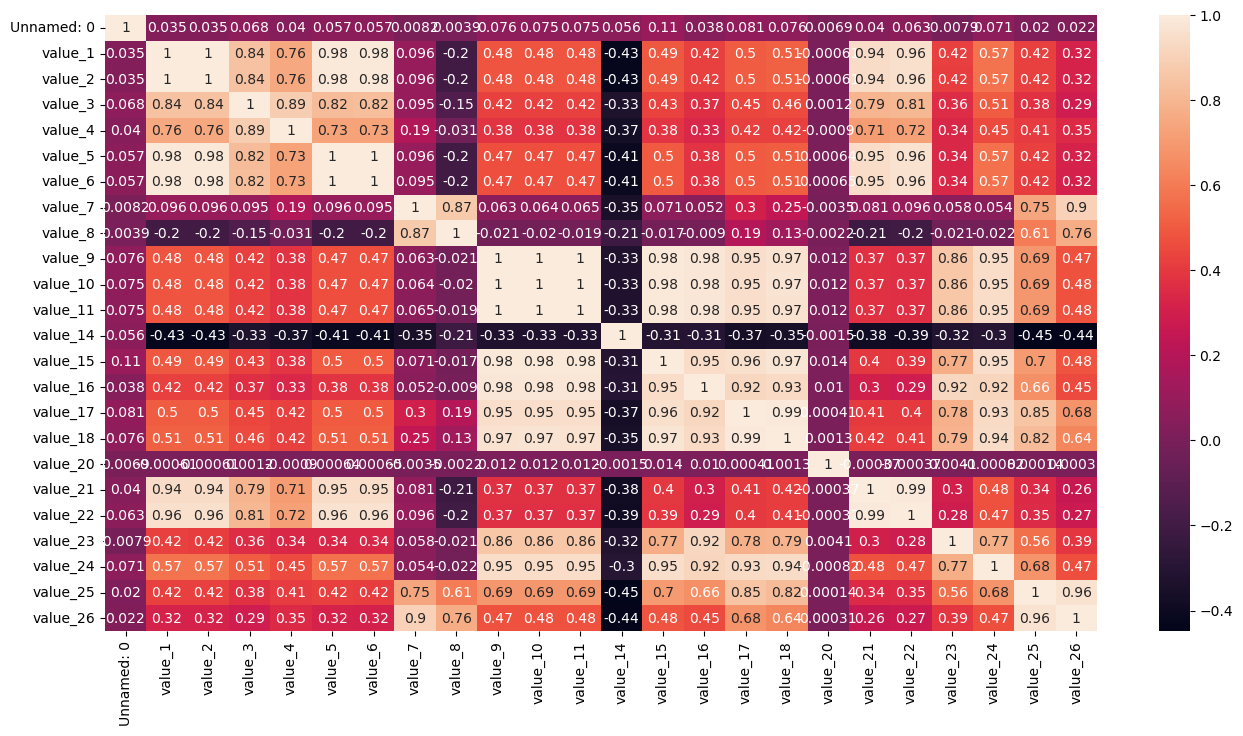

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(sensor_features.corr(),annot=True)
plt.show()

In [22]:
sensor_features.shape

(541440, 26)

In [23]:
sensor_numeric=sensor_features.select_dtypes(include=[np.number])

In [24]:
sensor_numeric.shape

(541440, 24)

In [25]:
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(sensor_numeric.values,i) for i in range(sensor_numeric.shape[1])]

In [26]:
vif["Features"]=sensor_numeric.columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,92089.605037,value_6
1,91568.463615,value_5
2,14261.375521,value_9
3,12469.265624,value_11
4,9745.180652,value_2
5,9629.410120,value_1
6,6387.340324,value_10
7,416.606636,value_18
8,243.552826,value_25
9,194.864014,value_15


There are many variables with VIF greater than 10. Lets remove the features with VIF more than 10 as the remaining features with VIF less than can expalian more than 90% of the variation in the data

In [31]:
#Iteratively check the VIF of all the features as the high VIF features get deleted iteratively
for ind in range(len(sensor_numeric.columns)):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(sensor_numeric.values,i) for i in range(sensor_numeric.shape[1])]
    vif['Features']=sensor_numeric.columns
    multi=vif[vif['VIF_Factor']>10]

    if (multi.empty==False):
        df_sorted=multi.sort_values(by='VIF_Factor',ascending=False)
    else:
        print(vif)
        break


    if(df_sorted.empty==False):
        sensor_numeric=sensor_numeric.drop(df_sorted.Features.iloc[0],axis=1)
    else:
        print(vif)


    VIF_Factor    Features
0     1.043935  Unnamed: 0
1     6.633055     value_3
2     4.975185     value_4
3     6.312620     value_7
4     6.461470     value_8
5     1.434528    value_14
6     2.775722    value_15
7     1.000377    value_20
8     3.387088    value_21
9     2.576010    value_23
10    1.023330    value_26


,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_7,value_8,value_9,value_10,...,value_16,value_17,value_18,value_20,value_21,value_22,value_23,value_24,value_25,value_26
0,-1.732046,0.221853,0.226327,0.135179,0.168081,0.301402,0.221587,0.374209,0.409362,0.407548,...,0.290351,0.408936,0.440691,-0.076335,0.280210,0.173931,0.019886,0.435119,0.482652,91.733589
1,-1.732040,0.229970,0.235964,0.138377,0.149947,0.301447,0.221931,0.372755,0.403651,0.402235,...,0.283359,0.408882,0.440692,-0.076362,0.277716,0.177970,0.018712,0.435104,0.482772,91.731514
2,-1.732033,0.238087,0.231383,0.128198,0.143556,0.301492,0.222274,0.371300,0.379912,0.378510,...,0.282710,0.408829,0.440693,-0.076388,0.301374,0.182010,0.017539,0.435090,0.482893,91.729446
3,-1.732027,0.226457,0.226802,0.131846,0.148518,0.301538,0.222618,0.369846,0.397064,0.395652,...,0.281249,0.408775,0.440693,-0.076415,0.282519,0.186049,0.016366,0.435075,0.483013,91.727379
4,-1.732020,0.214029,0.222220,0.135493,0.147340,0.301583,0.222962,0.368391,0.379912,0.395652,...,0.286446,0.408721,0.440694,-0.076441,0.298590,0.190089,0.015193,0.435061,0.483135,91.725311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541435,1.732020,0.150915,0.160902,0.276000,0.351526,0.318734,1.517693,1.659739,0.379912,0.378510,...,0.283759,0.806219,0.660743,0.023280,0.238288,0.276004,-0.011825,0.433934,1.359095,106.379387
541436,1.732027,0.168641,0.158285,0.277735,0.345402,0.317863,1.517501,1.659477,0.379912,0.378510,...,0.264415,0.806117,0.660688,0.023306,0.219245,0.276017,-0.011374,0.433933,1.358920,106.369682
541437,1.732033,0.200741,0.200571,0.284347,0.344528,0.316992,1.517311,1.659215,0.379912,0.378510,...,0.259152,0.806014,0.660634,0.023333,0.229519,0.276030,-0.010924,0.433932,1.358746,106.359985
541438,1.732040,0.271199,0.269054,0.294781,0.344756,0.317106,1.517120,1.658953,0.379912,0.378510,...,0.255013,0.805913,0.660579,0.023360,0.219982,0.276044,-0.010473,0.433930,1.358571,106.350281


,VIF_Factor,Features
0,1.512377,Unnamed: 0
1,9629.410120,value_1
2,9745.180652,value_2
3,9.567270,value_3
4,5.218680,value_4
5,91568.463615,value_5
6,92089.605037,value_6
7,66.050735,value_7
8,10.626844,value_8
9,14261.375521,value_9
